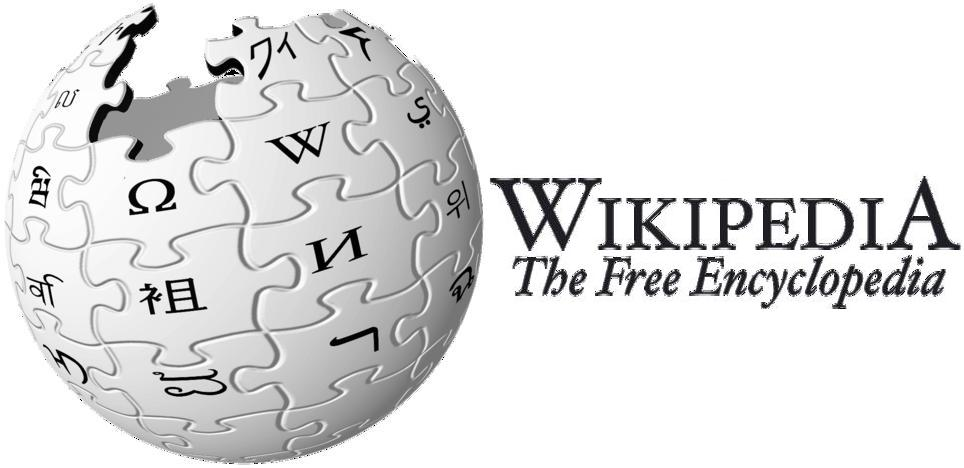

## Introducing Wikipedia Data
In this guided project, we'll work with data scraped from Wikipedia. Volunteer content contributors and editors maintain Wikipedia by continuously improving content. Anyone can edit Wikipedia (but we still use it for our homework and fact-checking). 

We'll implement a simplified version of the [grep command-line utility](https://en.wikipedia.org/wiki/Grep) to search for data in 54 megabytes worth of articles. If you're not familiar with the grep command, the grep utility essentially allows searching for textual data in all files from a given directory.

Articles were saved using the last component of their URLs. For example, a page on Wikipedia has the URL structure https://en.wikipedia.org/wiki/Yarkant_County. If we were saving the article with the previous URL, we'd save it to the file Yarkant_County.html. All the data files are in the wiki folder. Note that the files are raw HTML — here are the first few lines of Yarkant_County.html:



## Goal 
Our main goals will be the following:

* Search for all occurrences of a string in all of the files.
* Refine the result by providing the specific locations of the files.

## Data
We've randomly scraped 1000 Wikipedia articles using this link generator:

http://en.wikipedia.org/wiki/Special:Random

Source code of the script can be viewed in this [repository](https://github.com/gr3yw0rm/Dataquest-Showcases/tree/master/Analyzing%20Wikipedia%20Pages%20with%20MapReduce).

#### Let's start by listing all scraped files in the wiki folder

In [1]:
import os

wiki_files = os.listdir('wiki')

# First 5 files
for i in range(5):
    print(wiki_files[i])

print(f"\nTotal files: {len(wiki_files)}")

100_Greatest_Romanians.html
104th_Logistic_Support_Brigade_(United_Kingdom).html
16th_Virginia_Infantry.html
1896_Indiana_Hoosiers_football_team.html
1898_Colgate_football_team.html

Total files: 999


#### Reading the first file content

In [2]:
with open(os.path.join("wiki", wiki_files[0]), encoding='utf8') as file:
    read_file = file.read()
    print(read_file[:1000])
    print(read_file[-1000:])    

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>100 Greatest Romanians - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"100_Greatest_Romanians","wgTitle":"100 Greatest Romanians","wgCurRevisionId":739997309,"wgRevisionId":739997309,"wgArticleId":5885981,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from November 2012","Articles containing Romanian-language text","Greatest Nationals","Lists of Romanian people","Romanian Television","Romanian television series"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"w

## Adding the MapReduce Framework

Google invented [MapReduce](https://en.wikipedia.org/wiki/MapReduce) as a framework for processing data in parallel. The following describes how MapReduce works:

1. Divide: divide the data into chunks.
2. Map: use parallel processing to process each chunk.
3. Reduce: combine the individual chunk results into a global result.

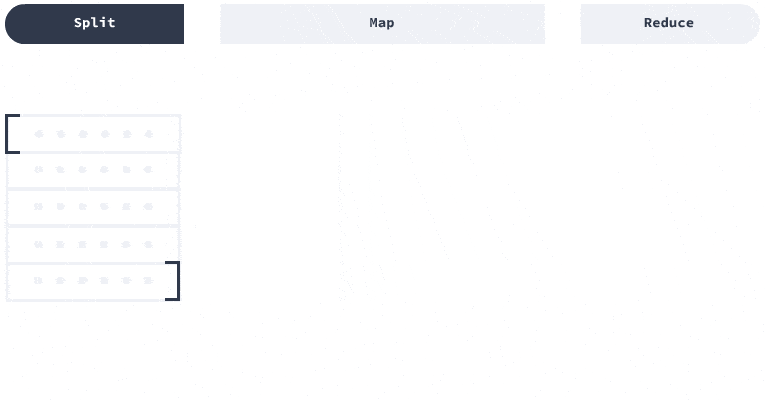
Source: ***Dataquest***

Our implementation will not be as complex as some available implementations, like [Hadoop MapReduce](https://hadoop.apache.org/docs/current/hadoop-mapreduce-client/hadoop-mapreduce-client-core/MapReduceTutorial.html). We will use the multiprocessing module to implement our own version of MapReduce.

In [3]:
import math
import functools
from multiprocessing import Pool

def make_chunks(data, num_chunks):
    chunk_size = math.ceil(len(data) / num_chunks)
    return [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)]

def map_reduce(data, num_processes, mapper, reducer):
    chunks = make_chunks(data, num_processes)
    pool = Pool(num_processes)
    chunk_results = pool.map(mapper, chunks)
    return functools.reduce(reducer, chunk_results)

#### Counting the total number of lines in all files

In [ ]:
def map_line_count(files):
    lines = 0
    for file in files:
        with open(os.path.join("wiki", file)) as f:
            lines += len(f.readlines())
    return lines

def reduce_line_count(count1, count2):
    return count1 + count2

total_lines = map_reduce(wiki_files, 10, map_line_count, reduce_line_count)
print(f"{total_lines} total lines in all files")

## MapReduce Grep Function
The goal is to locate all lines in all files from the wiki folder that contains a given string.

For example, imagine that we had two text files with the contents shown in the following diagram:



If the target string is "more", then the output should be a dictionary where the keys are the file names and the values are the list of all line numbers that contain the string "more". In the example above, the result would be the following:

{
    'file1': [1],
    'file2': [0, 2]
}

The dictionary above means that the string "more" occurs on line 1 from file1 and on lines 0 and 2 from file2.

In [ ]:
def map_grep(files):
    grep = {}
    for file in files:
        with open(os.path.join(files, file), 'r') as f:
            lines = [line.lower() for line in f.readlines()]
        for index, line in enumerate(lines):
            if target_string.lower() in line: # allows for case insensitive matches
                if file not in grep:
                    grep[file] = []
                grep[file].append(index)
    return grep

def reduce_grep(grep1, grep2):
    return grep1.update(grep2)

def map_reduce_grep(directory, target_string, num_processes):
    data = [os.path.join(directory, filename) for filename in os.listdir(directory)]
    return map_reduce(data, num_processes, map_grep, reduce_grep)

#### Finding all occurrences of the string "data" in the files stored in the wiki folder

In [ ]:
target_string = "data"  # target string is defined outside the function
map_reduce_grep('wiki', 'data', 10)

<svg width="440" height="110" viewBox="0 0 440 110" fill="none" xmlns="http://www.w3.org/2000/svg">
<rect width="440" height="110" fill="white"/>
<g filter="url(#filter0_d)">
<rect x="3" y="3" width="202" height="104" rx="4.5" fill="white"/>
</g>
<g filter="url(#filter1_d)">
<rect x="235" y="3" width="202" height="104" rx="4.5" fill="white"/>
</g>
<g style="mix-blend-mode:hard-light">
<rect x="58" y="53" width="34" height="22" rx="6" fill="#E05959"/>
</g>
<g style="mix-blend-mode:hard-light">
<rect x="296" y="28" width="34" height="22" rx="6" fill="#E05959"/>
</g>
<g style="mix-blend-mode:hard-light">
<rect x="284" y="78" width="34" height="22" rx="6" fill="#E05959"/>
</g>
<path d="M14.28 17V13H12.92V12.14L14.28 12.09V11.82C14.28 11.5333 14.32 11.2667 14.4 11.02C14.48 10.7733 14.6033 10.5633 14.77 10.39C14.9433 10.21 15.16 10.07 15.42 9.97C15.6867 9.87 16 9.82 16.36 9.82C16.6267 9.82 16.88 9.84333 17.12 9.89C17.3667 9.93667 17.6 10.0033 17.82 10.09L17.58 10.94C17.4 10.8667 17.2233 10.8133 17.05 10.78C16.8833 10.7467 16.7 10.73 16.5 10.73C16.12 10.73 15.8433 10.8233 15.67 11.01C15.5033 11.19 15.42 11.4533 15.42 11.8V12.09H17.29V13H15.42V17H14.28ZM20.9661 17V13H18.8361V12.09H22.1161V17H20.9661ZM21.4661 11.19C21.2328 11.19 21.0361 11.12 20.8761 10.98C20.7228 10.84 20.6461 10.6533 20.6461 10.42C20.6461 10.1867 20.7228 10 20.8761 9.86C21.0361 9.71333 21.2328 9.64 21.4661 9.64C21.6994 9.64 21.8928 9.71333 22.0461 9.86C22.2061 10 22.2861 10.1867 22.2861 10.42C22.2861 10.6533 22.2061 10.84 22.0461 10.98C21.8928 11.12 21.6994 11.19 21.4661 11.19ZM28.0022 17.12C27.4289 17.12 26.9922 16.9533 26.6922 16.62C26.3989 16.2867 26.2522 15.8167 26.2522 15.21V10.85H24.6122V9.94H27.4022V15.27C27.4022 15.6033 27.4855 15.84 27.6522 15.98C27.8255 16.1133 28.0355 16.18 28.2822 16.18C28.5422 16.18 28.8222 16.1167 29.1222 15.99L29.3922 16.84C29.1522 16.9333 28.9322 17.0033 28.7322 17.05C28.5322 17.0967 28.2889 17.12 28.0022 17.12ZM33.2883 17.12C32.9149 17.12 32.5649 17.0633 32.2383 16.95C31.9116 16.83 31.6249 16.66 31.3783 16.44C31.1383 16.22 30.9483 15.95 30.8083 15.63C30.6683 15.31 30.5983 14.9467 30.5983 14.54C30.5983 14.14 30.6683 13.7833 30.8083 13.47C30.9483 13.15 31.1349 12.88 31.3683 12.66C31.6083 12.4333 31.8783 12.2633 32.1783 12.15C32.4849 12.03 32.8049 11.97 33.1383 11.97C33.5049 11.97 33.8283 12.03 34.1083 12.15C34.3883 12.2633 34.6249 12.4233 34.8183 12.63C35.0116 12.83 35.1583 13.0733 35.2583 13.36C35.3583 13.6467 35.4083 13.96 35.4083 14.3C35.4083 14.4133 35.4016 14.5233 35.3883 14.63C35.3816 14.73 35.3716 14.8133 35.3583 14.88H31.7483C31.8149 15.34 31.9983 15.68 32.2983 15.9C32.5983 16.12 32.9783 16.23 33.4383 16.23C33.6983 16.23 33.9383 16.1933 34.1583 16.12C34.3783 16.0467 34.5983 15.9467 34.8183 15.82L35.2083 16.54C34.9483 16.7133 34.6516 16.8533 34.3183 16.96C33.9916 17.0667 33.6483 17.12 33.2883 17.12ZM33.1683 12.86C32.8283 12.86 32.5283 12.96 32.2683 13.16C32.0149 13.36 31.8516 13.66 31.7783 14.06H34.3883C34.3483 13.66 34.2216 13.36 34.0083 13.16C33.8016 12.96 33.5216 12.86 33.1683 12.86ZM36.8644 17V16.06H38.6344V11.88H37.2244V11.16C37.4244 11.1333 37.6044 11.1033 37.7644 11.07C37.9244 11.03 38.071 10.99 38.2044 10.95C38.3444 10.91 38.4744 10.8633 38.5944 10.81C38.7144 10.7567 38.831 10.7 38.9444 10.64H39.7844V16.06H41.3444V17H36.8644Z" fill="#ABB3C9"/>
<path d="M12.65 92V91.33C13.15 90.9033 13.5967 90.5133 13.99 90.16C14.3833 89.8 14.7167 89.4667 14.99 89.16C15.27 88.8533 15.4833 88.5667 15.63 88.3C15.7767 88.0333 15.85 87.7767 15.85 87.53C15.85 87.19 15.7467 86.9233 15.54 86.73C15.3333 86.53 15.03 86.43 14.63 86.43C14.35 86.43 14.0933 86.5 13.86 86.64C13.6333 86.78 13.4233 86.9467 13.23 87.14L12.6 86.5C12.9067 86.1867 13.23 85.9467 13.57 85.78C13.91 85.6067 14.3133 85.52 14.78 85.52C15.1067 85.52 15.4033 85.5667 15.67 85.66C15.9367 85.7533 16.1633 85.8867 16.35 86.06C16.5433 86.2267 16.69 86.43 16.79 86.67C16.8967 86.91 16.95 87.1767 16.95 87.47C16.95 87.75 16.88 88.0367 16.74 88.33C16.6067 88.6167 16.4233 88.91 16.19 89.21C15.9567 89.5033 15.6767 89.8067 15.35 90.12C15.03 90.4333 14.6867 90.7567 14.32 91.09C14.5067 91.0767 14.7033 91.0633 14.91 91.05C15.1167 91.03 15.3067 91.02 15.48 91.02H17.28V92H12.65Z" fill="#ABB3C9"/>
<path d="M15 42.12C14.2733 42.12 13.6967 41.8333 13.27 41.26C12.85 40.6867 12.64 39.8633 12.64 38.79C12.64 37.71 12.85 36.8967 13.27 36.35C13.6967 35.7967 14.2733 35.52 15 35.52C15.7267 35.52 16.3 35.7967 16.72 36.35C17.1467 36.8967 17.36 37.71 17.36 38.79C17.36 39.8633 17.1467 40.6867 16.72 41.26C16.3 41.8333 15.7267 42.12 15 42.12ZM15 41.22C15.1867 41.22 15.36 41.1767 15.52 41.09C15.6867 40.9967 15.8267 40.8533 15.94 40.66C16.06 40.4667 16.1533 40.2167 16.22 39.91C16.2867 39.5967 16.32 39.2233 16.32 38.79C16.32 38.3567 16.2867 37.99 16.22 37.69C16.1533 37.3833 16.06 37.1367 15.94 36.95C15.8267 36.7633 15.6867 36.63 15.52 36.55C15.36 36.4633 15.1867 36.42 15 36.42C14.8067 36.42 14.63 36.4633 14.47 36.55C14.31 36.63 14.17 36.7633 14.05 36.95C13.9367 37.1367 13.8467 37.3833 13.78 37.69C13.7133 37.99 13.68 38.3567 13.68 38.79C13.68 39.2233 13.7133 39.5967 13.78 39.91C13.8467 40.2167 13.9367 40.4667 14.05 40.66C14.17 40.8533 14.31 40.9967 14.47 41.09C14.63 41.1767 14.8067 41.22 15 41.22ZM15 39.46C14.8067 39.46 14.6433 39.3967 14.51 39.27C14.3767 39.1433 14.31 38.97 14.31 38.75C14.31 38.53 14.3767 38.3567 14.51 38.23C14.6433 38.1033 14.8067 38.04 15 38.04C15.1933 38.04 15.3567 38.1033 15.49 38.23C15.6233 38.3567 15.69 38.53 15.69 38.75C15.69 38.97 15.6233 39.1433 15.49 39.27C15.3567 39.3967 15.1933 39.46 15 39.46Z" fill="#ABB3C9"/>
<path d="M36.3 42.12C35.9267 42.12 35.5767 42.0633 35.25 41.95C34.9233 41.83 34.6367 41.66 34.39 41.44C34.15 41.22 33.96 40.95 33.82 40.63C33.68 40.31 33.61 39.9467 33.61 39.54C33.61 39.14 33.68 38.7833 33.82 38.47C33.96 38.15 34.1467 37.88 34.38 37.66C34.62 37.4333 34.89 37.2633 35.19 37.15C35.4967 37.03 35.8167 36.97 36.15 36.97C36.5167 36.97 36.84 37.03 37.12 37.15C37.4 37.2633 37.6367 37.4233 37.83 37.63C38.0233 37.83 38.17 38.0733 38.27 38.36C38.37 38.6467 38.42 38.96 38.42 39.3C38.42 39.4133 38.4133 39.5233 38.4 39.63C38.3933 39.73 38.3833 39.8133 38.37 39.88H34.76C34.8267 40.34 35.01 40.68 35.31 40.9C35.61 41.12 35.99 41.23 36.45 41.23C36.71 41.23 36.95 41.1933 37.17 41.12C37.39 41.0467 37.61 40.9467 37.83 40.82L38.22 41.54C37.96 41.7133 37.6633 41.8533 37.33 41.96C37.0033 42.0667 36.66 42.12 36.3 42.12ZM36.18 37.86C35.84 37.86 35.54 37.96 35.28 38.16C35.0267 38.36 34.8633 38.66 34.79 39.06H37.4C37.36 38.66 37.2333 38.36 37.02 38.16C36.8133 37.96 36.5333 37.86 36.18 37.86ZM39.5061 42L41.2861 39.45L39.6261 37.09H40.8761L41.5161 38.02C41.5961 38.1533 41.6828 38.2933 41.7761 38.44C41.8694 38.58 41.9628 38.72 42.0561 38.86H42.0961C42.1694 38.72 42.2494 38.5767 42.3361 38.43C42.4228 38.2833 42.5028 38.1433 42.5761 38.01L43.1561 37.09H44.3661L42.6961 39.57L44.4861 42H43.2361L42.5261 41.03C42.4328 40.8967 42.3328 40.7533 42.2261 40.6C42.1261 40.4467 42.0261 40.3 41.9261 40.16H41.8861C41.7928 40.3067 41.7028 40.4533 41.6161 40.6C41.5361 40.74 41.4494 40.8867 41.3561 41.04L40.7161 42H39.5061ZM47.3422 42.12C47.1022 42.12 46.8822 42.0833 46.6822 42.01C46.4822 41.9433 46.3089 41.8467 46.1622 41.72C46.0155 41.5933 45.9022 41.4433 45.8222 41.27C45.7422 41.09 45.7022 40.8933 45.7022 40.68C45.7022 40.4067 45.7655 40.1667 45.8922 39.96C46.0189 39.7467 46.2189 39.5667 46.4922 39.42C46.7655 39.2733 47.1155 39.1533 47.5422 39.06C47.9689 38.9667 48.4855 38.9 49.0922 38.86C49.0722 38.58 48.9722 38.35 48.7922 38.17C48.6122 37.99 48.3222 37.9 47.9222 37.9C47.6422 37.9 47.3655 37.9533 47.0922 38.06C46.8255 38.16 46.5655 38.28 46.3122 38.42L45.8922 37.65C46.1922 37.4767 46.5355 37.32 46.9222 37.18C47.3089 37.04 47.7122 36.97 48.1322 36.97C48.8189 36.97 49.3422 37.1533 49.7022 37.52C50.0622 37.88 50.2422 38.4033 50.2422 39.09V42H49.3022L49.2122 41.39H49.1822C48.9222 41.59 48.6322 41.7633 48.3122 41.91C47.9989 42.05 47.6755 42.12 47.3422 42.12ZM47.6922 41.22C47.9389 41.22 48.1755 41.1667 48.4022 41.06C48.6355 40.9467 48.8655 40.8 49.0922 40.62V39.58C48.6522 39.6133 48.2855 39.66 47.9922 39.72C47.6989 39.7733 47.4655 39.8433 47.2922 39.93C47.1189 40.0167 46.9955 40.1167 46.9222 40.23C46.8489 40.3367 46.8122 40.4567 46.8122 40.59C46.8122 40.81 46.8955 40.97 47.0622 41.07C47.2355 41.17 47.4455 41.22 47.6922 41.22ZM51.4483 42V37.09H52.3383L52.4283 37.71H52.4583C52.5649 37.4967 52.7016 37.32 52.8683 37.18C53.0349 37.04 53.2616 36.97 53.5483 36.97C54.0083 36.97 54.3049 37.2433 54.4383 37.79C54.5516 37.55 54.6949 37.3533 54.8683 37.2C55.0416 37.0467 55.2716 36.97 55.5583 36.97C55.9049 36.97 56.1716 37.1067 56.3583 37.38C56.5516 37.6467 56.6483 38.0267 56.6483 38.52V42H55.5383V38.6C55.5383 38.1667 55.4083 37.95 55.1483 37.95C55.0149 37.95 54.9016 38.0033 54.8083 38.11C54.7216 38.21 54.6283 38.3633 54.5283 38.57V42H53.5683V38.6C53.5683 38.3867 53.5383 38.2267 53.4783 38.12C53.4183 38.0067 53.3183 37.95 53.1783 37.95C53.0449 37.95 52.9316 38.0033 52.8383 38.11C52.7516 38.21 52.6616 38.3633 52.5683 38.57V42H51.4483ZM57.8044 43.94V37.09H58.7544L58.8444 37.65H58.8744C59.0877 37.4567 59.331 37.2967 59.6044 37.17C59.8844 37.0367 60.1644 36.97 60.4444 36.97C60.7644 36.97 61.0477 37.03 61.2944 37.15C61.5477 37.2633 61.7577 37.43 61.9244 37.65C62.0977 37.87 62.2277 38.1333 62.3144 38.44C62.4077 38.7467 62.4544 39.09 62.4544 39.47C62.4544 39.89 62.3944 40.2667 62.2744 40.6C62.1544 40.9267 61.991 41.2033 61.7844 41.43C61.5844 41.65 61.351 41.82 61.0844 41.94C60.8244 42.06 60.5544 42.12 60.2744 42.12C60.0477 42.12 59.8144 42.07 59.5744 41.97C59.341 41.87 59.1277 41.7267 58.9344 41.54H58.9044L58.9644 42.4V43.94H57.8044ZM60.0344 41.17C60.3877 41.17 60.681 41.03 60.9144 40.75C61.1477 40.4633 61.2644 40.04 61.2644 39.48C61.2644 38.9867 61.1744 38.6033 60.9944 38.33C60.8144 38.0567 60.5244 37.92 60.1244 37.92C59.9377 37.92 59.7477 37.9667 59.5544 38.06C59.361 38.1533 59.1644 38.3033 58.9644 38.51V40.72C59.1444 40.8867 59.3277 41.0033 59.5144 41.07C59.7077 41.1367 59.881 41.17 60.0344 41.17ZM66.9905 42.12C66.4171 42.12 65.9805 41.9533 65.6805 41.62C65.3871 41.2867 65.2405 40.8167 65.2405 40.21V35.85H63.6005V34.94H66.3905V40.27C66.3905 40.6033 66.4738 40.84 66.6405 40.98C66.8138 41.1133 67.0238 41.18 67.2705 41.18C67.5305 41.18 67.8105 41.1167 68.1105 40.99L68.3805 41.84C68.1405 41.9333 67.9205 42.0033 67.7205 42.05C67.5205 42.0967 67.2771 42.12 66.9905 42.12ZM72.2766 42.12C71.9032 42.12 71.5532 42.0633 71.2266 41.95C70.8999 41.83 70.6132 41.66 70.3666 41.44C70.1266 41.22 69.9366 40.95 69.7966 40.63C69.6566 40.31 69.5866 39.9467 69.5866 39.54C69.5866 39.14 69.6566 38.7833 69.7966 38.47C69.9366 38.15 70.1232 37.88 70.3566 37.66C70.5966 37.4333 70.8666 37.2633 71.1666 37.15C71.4732 37.03 71.7932 36.97 72.1266 36.97C72.4932 36.97 72.8166 37.03 73.0966 37.15C73.3766 37.2633 73.6132 37.4233 73.8066 37.63C73.9999 37.83 74.1466 38.0733 74.2466 38.36C74.3466 38.6467 74.3966 38.96 74.3966 39.3C74.3966 39.4133 74.3899 39.5233 74.3766 39.63C74.3699 39.73 74.3599 39.8133 74.3466 39.88H70.7366C70.8032 40.34 70.9866 40.68 71.2866 40.9C71.5866 41.12 71.9666 41.23 72.4266 41.23C72.6866 41.23 72.9266 41.1933 73.1466 41.12C73.3666 41.0467 73.5866 40.9467 73.8066 40.82L74.1966 41.54C73.9366 41.7133 73.6399 41.8533 73.3066 41.96C72.9799 42.0667 72.6366 42.12 72.2766 42.12ZM72.1566 37.86C71.8166 37.86 71.5166 37.96 71.2566 38.16C71.0032 38.36 70.8399 38.66 70.7666 39.06H73.3766C73.3366 38.66 73.2099 38.36 72.9966 38.16C72.7899 37.96 72.5099 37.86 72.1566 37.86ZM83.2488 42V38H81.8888V37.14L83.2488 37.09V36.82C83.2488 36.5333 83.2888 36.2667 83.3688 36.02C83.4488 35.7733 83.5721 35.5633 83.7388 35.39C83.9121 35.21 84.1288 35.07 84.3888 34.97C84.6554 34.87 84.9688 34.82 85.3288 34.82C85.5954 34.82 85.8488 34.8433 86.0888 34.89C86.3354 34.9367 86.5688 35.0033 86.7888 35.09L86.5488 35.94C86.3688 35.8667 86.1921 35.8133 86.0187 35.78C85.8521 35.7467 85.6688 35.73 85.4688 35.73C85.0888 35.73 84.8121 35.8233 84.6388 36.01C84.4721 36.19 84.3888 36.4533 84.3888 36.8V37.09H86.2588V38H84.3888V42H83.2488ZM89.9348 42V38H87.8048V37.09H91.0848V42H89.9348ZM90.4348 36.19C90.2015 36.19 90.0048 36.12 89.8448 35.98C89.6915 35.84 89.6148 35.6533 89.6148 35.42C89.6148 35.1867 89.6915 35 89.8448 34.86C90.0048 34.7133 90.2015 34.64 90.4348 34.64C90.6682 34.64 90.8615 34.7133 91.0148 34.86C91.1748 35 91.2548 35.1867 91.2548 35.42C91.2548 35.6533 91.1748 35.84 91.0148 35.98C90.8615 36.12 90.6682 36.19 90.4348 36.19ZM94.2609 42V37.09H95.2109L95.3109 38.2H95.3409C95.5943 37.8 95.8976 37.4967 96.2509 37.29C96.6109 37.0767 97.0043 36.97 97.4309 36.97C97.6309 36.97 97.8009 36.9867 97.9409 37.02C98.0876 37.0467 98.2343 37.0967 98.3809 37.17L98.1409 38.14C97.9809 38.0867 97.8376 38.05 97.7109 38.03C97.5909 38.0033 97.4376 37.99 97.2509 37.99C96.9109 37.99 96.5843 38.0867 96.2709 38.28C95.9576 38.4733 95.6743 38.81 95.4209 39.29V42H94.2609ZM101.987 42.12C101.527 42.12 101.087 42.0467 100.667 41.9C100.247 41.7467 99.8837 41.5667 99.577 41.36L100.077 40.63C100.377 40.8233 100.694 40.9767 101.027 41.09C101.367 41.1967 101.737 41.25 102.137 41.25C102.477 41.25 102.727 41.1933 102.887 41.08C103.054 40.9667 103.137 40.8267 103.137 40.66C103.137 40.58 103.12 40.51 103.087 40.45C103.054 40.3833 102.987 40.32 102.887 40.26C102.787 40.2 102.647 40.1433 102.467 40.09C102.294 40.0367 102.064 39.98 101.777 39.92C101.117 39.7867 100.634 39.6 100.327 39.36C100.027 39.12 99.877 38.8133 99.877 38.44C99.877 38.0067 100.064 37.6533 100.437 37.38C100.81 37.1067 101.344 36.97 102.037 36.97C102.444 36.97 102.824 37.0367 103.177 37.17C103.53 37.3033 103.834 37.4533 104.087 37.62L103.557 38.33C103.317 38.1767 103.06 38.0567 102.787 37.97C102.514 37.8833 102.23 37.84 101.937 37.84C101.61 37.84 101.377 37.8933 101.237 38C101.097 38.1 101.027 38.2267 101.027 38.38C101.027 38.5533 101.127 38.6833 101.327 38.77C101.527 38.8567 101.854 38.95 102.307 39.05C102.7 39.1367 103.024 39.23 103.277 39.33C103.53 39.43 103.73 39.5433 103.877 39.67C104.03 39.79 104.137 39.9267 104.197 40.08C104.257 40.2333 104.287 40.4067 104.287 40.6C104.287 40.8133 104.237 41.0133 104.137 41.2C104.037 41.38 103.89 41.54 103.697 41.68C103.504 41.8133 103.264 41.92 102.977 42C102.69 42.08 102.36 42.12 101.987 42.12ZM108.863 42.12C108.49 42.12 108.173 42.07 107.913 41.97C107.66 41.87 107.453 41.73 107.293 41.55C107.14 41.3633 107.026 41.14 106.953 40.88C106.886 40.62 106.853 40.3333 106.853 40.02V38H105.543V37.14L106.903 37.09L107.053 35.55H108.003V37.09H110.243V38H108.003V40.02C108.003 40.4267 108.086 40.7267 108.253 40.92C108.426 41.1067 108.723 41.2 109.143 41.2C109.35 41.2 109.54 41.1833 109.713 41.15C109.886 41.11 110.053 41.06 110.213 41L110.433 41.84C110.213 41.9133 109.976 41.9767 109.723 42.03C109.47 42.09 109.183 42.12 108.863 42.12ZM120.955 42.12C120.382 42.12 119.945 41.9533 119.645 41.62C119.352 41.2867 119.205 40.8167 119.205 40.21V35.85H117.565V34.94H120.355V40.27C120.355 40.6033 120.439 40.84 120.605 40.98C120.779 41.1133 120.989 41.18 121.235 41.18C121.495 41.18 121.775 41.1167 122.075 40.99L122.345 41.84C122.105 41.9333 121.885 42.0033 121.685 42.05C121.485 42.0967 121.242 42.12 120.955 42.12ZM125.911 42V38H123.781V37.09H127.061V42H125.911ZM126.411 36.19C126.178 36.19 125.981 36.12 125.821 35.98C125.668 35.84 125.591 35.6533 125.591 35.42C125.591 35.1867 125.668 35 125.821 34.86C125.981 34.7133 126.178 34.64 126.411 34.64C126.645 34.64 126.838 34.7133 126.991 34.86C127.151 35 127.231 35.1867 127.231 35.42C127.231 35.6533 127.151 35.84 126.991 35.98C126.838 36.12 126.645 36.19 126.411 36.19ZM129.758 42V37.09H130.708L130.798 37.83H130.838C131.071 37.5967 131.328 37.3967 131.608 37.23C131.894 37.0567 132.228 36.97 132.608 36.97C133.174 36.97 133.591 37.1433 133.858 37.49C134.124 37.83 134.258 38.32 134.258 38.96V42H133.098V39.11C133.098 38.71 133.028 38.42 132.888 38.24C132.754 38.0533 132.518 37.96 132.178 37.96C131.938 37.96 131.724 38.0167 131.538 38.13C131.351 38.2433 131.144 38.4167 130.918 38.65V42H129.758ZM138.234 42.12C137.86 42.12 137.51 42.0633 137.184 41.95C136.857 41.83 136.57 41.66 136.324 41.44C136.084 41.22 135.894 40.95 135.754 40.63C135.614 40.31 135.544 39.9467 135.544 39.54C135.544 39.14 135.614 38.7833 135.754 38.47C135.894 38.15 136.08 37.88 136.314 37.66C136.554 37.4333 136.824 37.2633 137.124 37.15C137.43 37.03 137.75 36.97 138.084 36.97C138.45 36.97 138.774 37.03 139.054 37.15C139.334 37.2633 139.57 37.4233 139.764 37.63C139.957 37.83 140.104 38.0733 140.204 38.36C140.304 38.6467 140.354 38.96 140.354 39.3C140.354 39.4133 140.347 39.5233 140.334 39.63C140.327 39.73 140.317 39.8133 140.304 39.88H136.694C136.76 40.34 136.944 40.68 137.244 40.9C137.544 41.12 137.924 41.23 138.384 41.23C138.644 41.23 138.884 41.1933 139.104 41.12C139.324 41.0467 139.544 40.9467 139.764 40.82L140.154 41.54C139.894 41.7133 139.597 41.8533 139.264 41.96C138.937 42.0667 138.594 42.12 138.234 42.12ZM138.114 37.86C137.774 37.86 137.474 37.96 137.214 38.16C136.96 38.36 136.797 38.66 136.724 39.06H139.334C139.294 38.66 139.167 38.36 138.954 38.16C138.747 37.96 138.467 37.86 138.114 37.86Z" fill="#30394B"/>
<path d="M12.88 67V66.06H14.65V61.88H13.24V61.16C13.44 61.1333 13.62 61.1033 13.78 61.07C13.94 61.03 14.0867 60.99 14.22 60.95C14.36 60.91 14.49 60.8633 14.61 60.81C14.73 60.7567 14.8467 60.7 14.96 60.64H15.8V66.06H17.36V67H12.88Z" fill="#E05959"/>
<path d="M36.03 67.12C35.57 67.12 35.13 67.0467 34.71 66.9C34.29 66.7467 33.9267 66.5667 33.62 66.36L34.12 65.63C34.42 65.8233 34.7367 65.9767 35.07 66.09C35.41 66.1967 35.78 66.25 36.18 66.25C36.52 66.25 36.77 66.1933 36.93 66.08C37.0967 65.9667 37.18 65.8267 37.18 65.66C37.18 65.58 37.1633 65.51 37.13 65.45C37.0967 65.3833 37.03 65.32 36.93 65.26C36.83 65.2 36.69 65.1433 36.51 65.09C36.3367 65.0367 36.1067 64.98 35.82 64.92C35.16 64.7867 34.6767 64.6 34.37 64.36C34.07 64.12 33.92 63.8133 33.92 63.44C33.92 63.0067 34.1067 62.6533 34.48 62.38C34.8533 62.1067 35.3867 61.97 36.08 61.97C36.4867 61.97 36.8667 62.0367 37.22 62.17C37.5733 62.3033 37.8767 62.4533 38.13 62.62L37.6 63.33C37.36 63.1767 37.1033 63.0567 36.83 62.97C36.5567 62.8833 36.2733 62.84 35.98 62.84C35.6533 62.84 35.42 62.8933 35.28 63C35.14 63.1 35.07 63.2267 35.07 63.38C35.07 63.5533 35.17 63.6833 35.37 63.77C35.57 63.8567 35.8967 63.95 36.35 64.05C36.7433 64.1367 37.0667 64.23 37.32 64.33C37.5733 64.43 37.7733 64.5433 37.92 64.67C38.0733 64.79 38.18 64.9267 38.24 65.08C38.3 65.2333 38.33 65.4067 38.33 65.6C38.33 65.8133 38.28 66.0133 38.18 66.2C38.08 66.38 37.9333 66.54 37.74 66.68C37.5467 66.8133 37.3067 66.92 37.02 67C36.7333 67.08 36.4033 67.12 36.03 67.12ZM41.9961 67.12C41.6761 67.12 41.3661 67.0633 41.0661 66.95C40.7661 66.8367 40.5028 66.67 40.2761 66.45C40.0494 66.23 39.8661 65.96 39.7261 65.64C39.5928 65.32 39.5261 64.9567 39.5261 64.55C39.5261 64.1433 39.5928 63.78 39.7261 63.46C39.8661 63.14 40.0494 62.87 40.2761 62.65C40.5028 62.43 40.7661 62.2633 41.0661 62.15C41.3661 62.03 41.6761 61.97 41.9961 61.97C42.3161 61.97 42.6261 62.03 42.9261 62.15C43.2261 62.2633 43.4894 62.43 43.7161 62.65C43.9428 62.87 44.1228 63.14 44.2561 63.46C44.3961 63.78 44.4661 64.1433 44.4661 64.55C44.4661 64.9567 44.3961 65.32 44.2561 65.64C44.1228 65.96 43.9428 66.23 43.7161 66.45C43.4894 66.67 43.2261 66.8367 42.9261 66.95C42.6261 67.0633 42.3161 67.12 41.9961 67.12ZM41.9961 66.18C42.3961 66.18 42.7094 66.0333 42.9361 65.74C43.1628 65.44 43.2761 65.0433 43.2761 64.55C43.2761 64.05 43.1628 63.6533 42.9361 63.36C42.7094 63.06 42.3961 62.91 41.9961 62.91C41.5961 62.91 41.2828 63.06 41.0561 63.36C40.8294 63.6533 40.7161 64.05 40.7161 64.55C40.7161 65.0433 40.8294 65.44 41.0561 65.74C41.2828 66.0333 41.5961 66.18 41.9961 66.18ZM45.4522 67V62.09H46.3422L46.4322 62.71H46.4622C46.5689 62.4967 46.7055 62.32 46.8722 62.18C47.0389 62.04 47.2655 61.97 47.5522 61.97C48.0122 61.97 48.3089 62.2433 48.4422 62.79C48.5555 62.55 48.6989 62.3533 48.8722 62.2C49.0455 62.0467 49.2755 61.97 49.5622 61.97C49.9089 61.97 50.1755 62.1067 50.3622 62.38C50.5555 62.6467 50.6522 63.0267 50.6522 63.52V67H49.5422V63.6C49.5422 63.1667 49.4122 62.95 49.1522 62.95C49.0189 62.95 48.9055 63.0033 48.8122 63.11C48.7255 63.21 48.6322 63.3633 48.5322 63.57V67H47.5722V63.6C47.5722 63.3867 47.5422 63.2267 47.4822 63.12C47.4222 63.0067 47.3222 62.95 47.1822 62.95C47.0489 62.95 46.9355 63.0033 46.8422 63.11C46.7555 63.21 46.6655 63.3633 46.5722 63.57V67H45.4522ZM54.2883 67.12C53.9149 67.12 53.5649 67.0633 53.2383 66.95C52.9116 66.83 52.6249 66.66 52.3783 66.44C52.1383 66.22 51.9483 65.95 51.8083 65.63C51.6683 65.31 51.5983 64.9467 51.5983 64.54C51.5983 64.14 51.6683 63.7833 51.8083 63.47C51.9483 63.15 52.1349 62.88 52.3683 62.66C52.6083 62.4333 52.8783 62.2633 53.1783 62.15C53.4849 62.03 53.8049 61.97 54.1383 61.97C54.5049 61.97 54.8283 62.03 55.1083 62.15C55.3883 62.2633 55.6249 62.4233 55.8183 62.63C56.0116 62.83 56.1583 63.0733 56.2583 63.36C56.3583 63.6467 56.4083 63.96 56.4083 64.3C56.4083 64.4133 56.4016 64.5233 56.3883 64.63C56.3816 64.73 56.3716 64.8133 56.3583 64.88H52.7483C52.8149 65.34 52.9983 65.68 53.2983 65.9C53.5983 66.12 53.9783 66.23 54.4383 66.23C54.6983 66.23 54.9383 66.1933 55.1583 66.12C55.3783 66.0467 55.5983 65.9467 55.8183 65.82L56.2083 66.54C55.9483 66.7133 55.6516 66.8533 55.3183 66.96C54.9916 67.0667 54.6483 67.12 54.2883 67.12ZM54.1683 62.86C53.8283 62.86 53.5283 62.96 53.2683 63.16C53.0149 63.36 52.8516 63.66 52.7783 64.06H55.3883C55.3483 63.66 55.2216 63.36 55.0083 63.16C54.8016 62.96 54.5216 62.86 54.1683 62.86ZM63.4405 67V62.09H64.3305L64.4205 62.71H64.4505C64.5571 62.4967 64.6938 62.32 64.8605 62.18C65.0271 62.04 65.2538 61.97 65.5405 61.97C66.0005 61.97 66.2971 62.2433 66.4305 62.79C66.5438 62.55 66.6871 62.3533 66.8605 62.2C67.0338 62.0467 67.2638 61.97 67.5505 61.97C67.8971 61.97 68.1638 62.1067 68.3505 62.38C68.5438 62.6467 68.6405 63.0267 68.6405 63.52V67H67.5305V63.6C67.5305 63.1667 67.4005 62.95 67.1405 62.95C67.0071 62.95 66.8938 63.0033 66.8005 63.11C66.7138 63.21 66.6205 63.3633 66.5205 63.57V67H65.5605V63.6C65.5605 63.3867 65.5305 63.2267 65.4705 63.12C65.4105 63.0067 65.3105 62.95 65.1705 62.95C65.0371 62.95 64.9238 63.0033 64.8305 63.11C64.7438 63.21 64.6538 63.3633 64.5605 63.57V67H63.4405ZM71.9766 67.12C71.6566 67.12 71.3466 67.0633 71.0466 66.95C70.7466 66.8367 70.4832 66.67 70.2566 66.45C70.0299 66.23 69.8466 65.96 69.7066 65.64C69.5732 65.32 69.5066 64.9567 69.5066 64.55C69.5066 64.1433 69.5732 63.78 69.7066 63.46C69.8466 63.14 70.0299 62.87 70.2566 62.65C70.4832 62.43 70.7466 62.2633 71.0466 62.15C71.3466 62.03 71.6566 61.97 71.9766 61.97C72.2966 61.97 72.6066 62.03 72.9066 62.15C73.2066 62.2633 73.4699 62.43 73.6966 62.65C73.9232 62.87 74.1032 63.14 74.2366 63.46C74.3766 63.78 74.4466 64.1433 74.4466 64.55C74.4466 64.9567 74.3766 65.32 74.2366 65.64C74.1032 65.96 73.9232 66.23 73.6966 66.45C73.4699 66.67 73.2066 66.8367 72.9066 66.95C72.6066 67.0633 72.2966 67.12 71.9766 67.12ZM71.9766 66.18C72.3766 66.18 72.6899 66.0333 72.9166 65.74C73.1432 65.44 73.2566 65.0433 73.2566 64.55C73.2566 64.05 73.1432 63.6533 72.9166 63.36C72.6899 63.06 72.3766 62.91 71.9766 62.91C71.5766 62.91 71.2632 63.06 71.0366 63.36C70.8099 63.6533 70.6966 64.05 70.6966 64.55C70.6966 65.0433 70.8099 65.44 71.0366 65.74C71.2632 66.0333 71.5766 66.18 71.9766 66.18ZM76.2727 67V62.09H77.2227L77.3227 63.2H77.3527C77.606 62.8 77.9093 62.4967 78.2627 62.29C78.6227 62.0767 79.016 61.97 79.4427 61.97C79.6427 61.97 79.8127 61.9867 79.9527 62.02C80.0993 62.0467 80.246 62.0967 80.3927 62.17L80.1527 63.14C79.9927 63.0867 79.8493 63.05 79.7227 63.03C79.6027 63.0033 79.4493 62.99 79.2627 62.99C78.9227 62.99 78.596 63.0867 78.2827 63.28C77.9693 63.4733 77.686 63.81 77.4327 64.29V67H76.2727ZM84.2688 67.12C83.8954 67.12 83.5454 67.0633 83.2188 66.95C82.8921 66.83 82.6054 66.66 82.3588 66.44C82.1188 66.22 81.9288 65.95 81.7888 65.63C81.6488 65.31 81.5788 64.9467 81.5788 64.54C81.5788 64.14 81.6488 63.7833 81.7888 63.47C81.9288 63.15 82.1154 62.88 82.3488 62.66C82.5888 62.4333 82.8588 62.2633 83.1588 62.15C83.4654 62.03 83.7854 61.97 84.1188 61.97C84.4854 61.97 84.8088 62.03 85.0888 62.15C85.3688 62.2633 85.6054 62.4233 85.7988 62.63C85.9921 62.83 86.1388 63.0733 86.2388 63.36C86.3388 63.6467 86.3888 63.96 86.3888 64.3C86.3888 64.4133 86.3821 64.5233 86.3688 64.63C86.3621 64.73 86.3521 64.8133 86.3388 64.88H82.7288C82.7954 65.34 82.9788 65.68 83.2788 65.9C83.5788 66.12 83.9588 66.23 84.4188 66.23C84.6788 66.23 84.9188 66.1933 85.1388 66.12C85.3588 66.0467 85.5788 65.9467 85.7988 65.82L86.1888 66.54C85.9288 66.7133 85.6321 66.8533 85.2988 66.96C84.9721 67.0667 84.6288 67.12 84.2688 67.12ZM84.1488 62.86C83.8088 62.86 83.5088 62.96 83.2488 63.16C82.9954 63.36 82.8321 63.66 82.7588 64.06H85.3688C85.3288 63.66 85.2021 63.36 84.9888 63.16C84.7821 62.96 84.5021 62.86 84.1488 62.86ZM96.8709 67.12C96.4976 67.12 96.1809 67.07 95.9209 66.97C95.6676 66.87 95.4609 66.73 95.3009 66.55C95.1476 66.3633 95.0343 66.14 94.9609 65.88C94.8943 65.62 94.8609 65.3333 94.8609 65.02V63H93.5509V62.14L94.9109 62.09L95.0609 60.55H96.0109V62.09H98.2509V63H96.0109V65.02C96.0109 65.4267 96.0943 65.7267 96.2609 65.92C96.4343 66.1067 96.7309 66.2 97.1509 66.2C97.3576 66.2 97.5476 66.1833 97.7209 66.15C97.8943 66.11 98.0609 66.06 98.2209 66L98.4409 66.84C98.2209 66.9133 97.9843 66.9767 97.7309 67.03C97.4776 67.09 97.1909 67.12 96.8709 67.12ZM102.257 67.12C101.884 67.12 101.534 67.0633 101.207 66.95C100.88 66.83 100.594 66.66 100.347 66.44C100.107 66.22 99.917 65.95 99.777 65.63C99.637 65.31 99.567 64.9467 99.567 64.54C99.567 64.14 99.637 63.7833 99.777 63.47C99.917 63.15 100.104 62.88 100.337 62.66C100.577 62.4333 100.847 62.2633 101.147 62.15C101.454 62.03 101.774 61.97 102.107 61.97C102.474 61.97 102.797 62.03 103.077 62.15C103.357 62.2633 103.594 62.4233 103.787 62.63C103.98 62.83 104.127 63.0733 104.227 63.36C104.327 63.6467 104.377 63.96 104.377 64.3C104.377 64.4133 104.37 64.5233 104.357 64.63C104.35 64.73 104.34 64.8133 104.327 64.88H100.717C100.784 65.34 100.967 65.68 101.267 65.9C101.567 66.12 101.947 66.23 102.407 66.23C102.667 66.23 102.907 66.1933 103.127 66.12C103.347 66.0467 103.567 65.9467 103.787 65.82L104.177 66.54C103.917 66.7133 103.62 66.8533 103.287 66.96C102.96 67.0667 102.617 67.12 102.257 67.12ZM102.137 62.86C101.797 62.86 101.497 62.96 101.237 63.16C100.984 63.36 100.82 63.66 100.747 64.06H103.357C103.317 63.66 103.19 63.36 102.977 63.16C102.77 62.96 102.49 62.86 102.137 62.86ZM105.463 67L107.243 64.45L105.583 62.09H106.833L107.473 63.02C107.553 63.1533 107.64 63.2933 107.733 63.44C107.826 63.58 107.92 63.72 108.013 63.86H108.053C108.126 63.72 108.206 63.5767 108.293 63.43C108.38 63.2833 108.46 63.1433 108.533 63.01L109.113 62.09H110.323L108.653 64.57L110.443 67H109.193L108.483 66.03C108.39 65.8967 108.29 65.7533 108.183 65.6C108.083 65.4467 107.983 65.3 107.883 65.16H107.843C107.75 65.3067 107.66 65.4533 107.573 65.6C107.493 65.74 107.406 65.8867 107.313 66.04L106.673 67H105.463ZM114.859 67.12C114.486 67.12 114.169 67.07 113.909 66.97C113.656 66.87 113.449 66.73 113.289 66.55C113.136 66.3633 113.023 66.14 112.949 65.88C112.883 65.62 112.849 65.3333 112.849 65.02V63H111.539V62.14L112.899 62.09L113.049 60.55H113.999V62.09H116.239V63H113.999V65.02C113.999 65.4267 114.083 65.7267 114.249 65.92C114.423 66.1067 114.719 66.2 115.139 66.2C115.346 66.2 115.536 66.1833 115.709 66.15C115.883 66.11 116.049 66.06 116.209 66L116.429 66.84C116.209 66.9133 115.973 66.9767 115.719 67.03C115.466 67.09 115.179 67.12 114.859 67.12Z" fill="#30394B"/>
<path d="M36.91 92.12C36.5367 92.12 36.22 92.07 35.96 91.97C35.7067 91.87 35.5 91.73 35.34 91.55C35.1867 91.3633 35.0733 91.14 35 90.88C34.9333 90.62 34.9 90.3333 34.9 90.02V88H33.59V87.14L34.95 87.09L35.1 85.55H36.05V87.09H38.29V88H36.05V90.02C36.05 90.4267 36.1333 90.7267 36.3 90.92C36.4733 91.1067 36.77 91.2 37.19 91.2C37.3967 91.2 37.5867 91.1833 37.76 91.15C37.9333 91.11 38.1 91.06 38.26 91L38.48 91.84C38.26 91.9133 38.0233 91.9767 37.77 92.03C37.5167 92.09 37.23 92.12 36.91 92.12ZM39.8161 92V84.94H40.9761V86.76L40.9061 87.81H40.9361C41.1494 87.5833 41.3961 87.3867 41.6761 87.22C41.9561 87.0533 42.2861 86.97 42.6661 86.97C43.2328 86.97 43.6494 87.1433 43.9161 87.49C44.1828 87.83 44.3161 88.32 44.3161 88.96V92H43.1561V89.11C43.1561 88.71 43.0861 88.42 42.9461 88.24C42.8128 88.0533 42.5761 87.96 42.2361 87.96C41.9961 87.96 41.7828 88.0167 41.5961 88.13C41.4094 88.2433 41.2028 88.4167 40.9761 88.65V92H39.8161ZM47.9622 92V88H45.8322V87.09H49.1122V92H47.9622ZM48.4622 86.19C48.2289 86.19 48.0322 86.12 47.8722 85.98C47.7189 85.84 47.6422 85.6533 47.6422 85.42C47.6422 85.1867 47.7189 85 47.8722 84.86C48.0322 84.7133 48.2289 84.64 48.4622 84.64C48.6955 84.64 48.8889 84.7133 49.0422 84.86C49.2022 85 49.2822 85.1867 49.2822 85.42C49.2822 85.6533 49.2022 85.84 49.0422 85.98C48.8889 86.12 48.6955 86.19 48.4622 86.19ZM52.2883 92V87.09H53.2383L53.3383 88.2H53.3683C53.6216 87.8 53.9249 87.4967 54.2783 87.29C54.6383 87.0767 55.0316 86.97 55.4583 86.97C55.6583 86.97 55.8283 86.9867 55.9683 87.02C56.1149 87.0467 56.2616 87.0967 56.4083 87.17L56.1683 88.14C56.0083 88.0867 55.8649 88.05 55.7383 88.03C55.6183 88.0033 55.4649 87.99 55.2783 87.99C54.9383 87.99 54.6116 88.0867 54.2983 88.28C53.9849 88.4733 53.7016 88.81 53.4483 89.29V92H52.2883ZM59.6144 92.12C59.301 92.12 59.0144 92.0633 58.7544 91.95C58.4944 91.83 58.271 91.66 58.0844 91.44C57.9044 91.22 57.7644 90.9533 57.6644 90.64C57.5644 90.32 57.5144 89.9567 57.5144 89.55C57.5144 89.15 57.5744 88.79 57.6944 88.47C57.8144 88.15 57.9744 87.88 58.1744 87.66C58.381 87.44 58.6144 87.27 58.8744 87.15C59.1344 87.03 59.4044 86.97 59.6844 86.97C59.9644 86.97 60.211 87.02 60.4244 87.12C60.6377 87.22 60.841 87.3633 61.0344 87.55H61.0644L61.0044 86.72V84.94H62.1644V92H61.2144L61.1244 91.43H61.0944C60.901 91.6233 60.6744 91.7867 60.4144 91.92C60.161 92.0533 59.8944 92.12 59.6144 92.12ZM59.8944 91.17C60.301 91.17 60.671 90.9733 61.0044 90.58V88.37C60.831 88.2033 60.6577 88.0867 60.4844 88.02C60.311 87.9533 60.1344 87.92 59.9544 87.92C59.781 87.92 59.6177 87.9567 59.4644 88.03C59.3177 88.1033 59.1877 88.21 59.0744 88.35C58.961 88.4833 58.871 88.65 58.8044 88.85C58.7377 89.05 58.7044 89.28 58.7044 89.54C58.7044 90.0733 58.8077 90.48 59.0144 90.76C59.221 91.0333 59.5144 91.17 59.8944 91.17ZM72.9866 92.12C72.4132 92.12 71.9766 91.9533 71.6766 91.62C71.3832 91.2867 71.2366 90.8167 71.2366 90.21V85.85H69.5966V84.94H72.3866V90.27C72.3866 90.6033 72.4699 90.84 72.6366 90.98C72.8099 91.1133 73.0199 91.18 73.2666 91.18C73.5266 91.18 73.8066 91.1167 74.1066 90.99L74.3766 91.84C74.1366 91.9333 73.9166 92.0033 73.7166 92.05C73.5166 92.0967 73.2732 92.12 72.9866 92.12ZM77.9427 92V88H75.8127V87.09H79.0927V92H77.9427ZM78.4427 86.19C78.2093 86.19 78.0127 86.12 77.8527 85.98C77.6993 85.84 77.6227 85.6533 77.6227 85.42C77.6227 85.1867 77.6993 85 77.8527 84.86C78.0127 84.7133 78.2093 84.64 78.4427 84.64C78.676 84.64 78.8693 84.7133 79.0227 84.86C79.1827 85 79.2627 85.1867 79.2627 85.42C79.2627 85.6533 79.1827 85.84 79.0227 85.98C78.8693 86.12 78.676 86.19 78.4427 86.19ZM81.7888 92V87.09H82.7388L82.8288 87.83H82.8688C83.1021 87.5967 83.3588 87.3967 83.6388 87.23C83.9254 87.0567 84.2588 86.97 84.6388 86.97C85.2054 86.97 85.6221 87.1433 85.8888 87.49C86.1554 87.83 86.2888 88.32 86.2888 88.96V92H85.1288V89.11C85.1288 88.71 85.0588 88.42 84.9188 88.24C84.7854 88.0533 84.5488 87.96 84.2088 87.96C83.9688 87.96 83.7554 88.0167 83.5688 88.13C83.3821 88.2433 83.1754 88.4167 82.9488 88.65V92H81.7888ZM90.2648 92.12C89.8915 92.12 89.5415 92.0633 89.2148 91.95C88.8882 91.83 88.6015 91.66 88.3548 91.44C88.1148 91.22 87.9248 90.95 87.7848 90.63C87.6448 90.31 87.5748 89.9467 87.5748 89.54C87.5748 89.14 87.6448 88.7833 87.7848 88.47C87.9248 88.15 88.1115 87.88 88.3448 87.66C88.5848 87.4333 88.8548 87.2633 89.1548 87.15C89.4615 87.03 89.7815 86.97 90.1148 86.97C90.4815 86.97 90.8048 87.03 91.0848 87.15C91.3648 87.2633 91.6015 87.4233 91.7948 87.63C91.9882 87.83 92.1348 88.0733 92.2348 88.36C92.3348 88.6467 92.3848 88.96 92.3848 89.3C92.3848 89.4133 92.3782 89.5233 92.3648 89.63C92.3582 89.73 92.3482 89.8133 92.3348 89.88H88.7248C88.7915 90.34 88.9748 90.68 89.2748 90.9C89.5748 91.12 89.9548 91.23 90.4148 91.23C90.6748 91.23 90.9148 91.1933 91.1348 91.12C91.3548 91.0467 91.5748 90.9467 91.7948 90.82L92.1848 91.54C91.9248 91.7133 91.6282 91.8533 91.2948 91.96C90.9682 92.0667 90.6248 92.12 90.2648 92.12ZM90.1448 87.86C89.8048 87.86 89.5048 87.96 89.2448 88.16C88.9915 88.36 88.8282 88.66 88.7548 89.06H91.3648C91.3248 88.66 91.1982 88.36 90.9848 88.16C90.7782 87.96 90.4982 87.86 90.1448 87.86Z" fill="#30394B"/>
<line x1="26.75" y1="107" x2="26.75" y2="28" stroke="#EFF1F6" stroke-width="0.5"/>
<path d="M246.28 17V13H244.92V12.14L246.28 12.09V11.82C246.28 11.5333 246.32 11.2667 246.4 11.02C246.48 10.7733 246.603 10.5633 246.77 10.39C246.943 10.21 247.16 10.07 247.42 9.97C247.687 9.87 248 9.82 248.36 9.82C248.627 9.82 248.88 9.84333 249.12 9.89C249.367 9.93667 249.6 10.0033 249.82 10.09L249.58 10.94C249.4 10.8667 249.223 10.8133 249.05 10.78C248.883 10.7467 248.7 10.73 248.5 10.73C248.12 10.73 247.843 10.8233 247.67 11.01C247.503 11.19 247.42 11.4533 247.42 11.8V12.09H249.29V13H247.42V17H246.28ZM252.966 17V13H250.836V12.09H254.116V17H252.966ZM253.466 11.19C253.233 11.19 253.036 11.12 252.876 10.98C252.723 10.84 252.646 10.6533 252.646 10.42C252.646 10.1867 252.723 10 252.876 9.86C253.036 9.71333 253.233 9.64 253.466 9.64C253.699 9.64 253.893 9.71333 254.046 9.86C254.206 10 254.286 10.1867 254.286 10.42C254.286 10.6533 254.206 10.84 254.046 10.98C253.893 11.12 253.699 11.19 253.466 11.19ZM260.002 17.12C259.429 17.12 258.992 16.9533 258.692 16.62C258.399 16.2867 258.252 15.8167 258.252 15.21V10.85H256.612V9.94H259.402V15.27C259.402 15.6033 259.486 15.84 259.652 15.98C259.826 16.1133 260.036 16.18 260.282 16.18C260.542 16.18 260.822 16.1167 261.122 15.99L261.392 16.84C261.152 16.9333 260.932 17.0033 260.732 17.05C260.532 17.0967 260.289 17.12 260.002 17.12ZM265.288 17.12C264.915 17.12 264.565 17.0633 264.238 16.95C263.912 16.83 263.625 16.66 263.378 16.44C263.138 16.22 262.948 15.95 262.808 15.63C262.668 15.31 262.598 14.9467 262.598 14.54C262.598 14.14 262.668 13.7833 262.808 13.47C262.948 13.15 263.135 12.88 263.368 12.66C263.608 12.4333 263.878 12.2633 264.178 12.15C264.485 12.03 264.805 11.97 265.138 11.97C265.505 11.97 265.828 12.03 266.108 12.15C266.388 12.2633 266.625 12.4233 266.818 12.63C267.012 12.83 267.158 13.0733 267.258 13.36C267.358 13.6467 267.408 13.96 267.408 14.3C267.408 14.4133 267.402 14.5233 267.388 14.63C267.382 14.73 267.372 14.8133 267.358 14.88H263.748C263.815 15.34 263.998 15.68 264.298 15.9C264.598 16.12 264.978 16.23 265.438 16.23C265.698 16.23 265.938 16.1933 266.158 16.12C266.378 16.0467 266.598 15.9467 266.818 15.82L267.208 16.54C266.948 16.7133 266.652 16.8533 266.318 16.96C265.992 17.0667 265.648 17.12 265.288 17.12ZM265.168 12.86C264.828 12.86 264.528 12.96 264.268 13.16C264.015 13.36 263.852 13.66 263.778 14.06H266.388C266.348 13.66 266.222 13.36 266.008 13.16C265.802 12.96 265.522 12.86 265.168 12.86ZM268.634 17V16.33C269.134 15.9033 269.581 15.5133 269.974 15.16C270.368 14.8 270.701 14.4667 270.974 14.16C271.254 13.8533 271.468 13.5667 271.614 13.3C271.761 13.0333 271.834 12.7767 271.834 12.53C271.834 12.19 271.731 11.9233 271.524 11.73C271.318 11.53 271.014 11.43 270.614 11.43C270.334 11.43 270.078 11.5 269.844 11.64C269.618 11.78 269.408 11.9467 269.214 12.14L268.584 11.5C268.891 11.1867 269.214 10.9467 269.554 10.78C269.894 10.6067 270.298 10.52 270.764 10.52C271.091 10.52 271.388 10.5667 271.654 10.66C271.921 10.7533 272.148 10.8867 272.334 11.06C272.528 11.2267 272.674 11.43 272.774 11.67C272.881 11.91 272.934 12.1767 272.934 12.47C272.934 12.75 272.864 13.0367 272.724 13.33C272.591 13.6167 272.408 13.91 272.174 14.21C271.941 14.5033 271.661 14.8067 271.334 15.12C271.014 15.4333 270.671 15.7567 270.304 16.09C270.491 16.0767 270.688 16.0633 270.894 16.05C271.101 16.03 271.291 16.02 271.464 16.02H273.264V17H268.634Z" fill="#ABB3C9"/>
<path d="M244.65 92V91.33C245.15 90.9033 245.597 90.5133 245.99 90.16C246.383 89.8 246.717 89.4667 246.99 89.16C247.27 88.8533 247.483 88.5667 247.63 88.3C247.777 88.0333 247.85 87.7767 247.85 87.53C247.85 87.19 247.747 86.9233 247.54 86.73C247.333 86.53 247.03 86.43 246.63 86.43C246.35 86.43 246.093 86.5 245.86 86.64C245.633 86.78 245.423 86.9467 245.23 87.14L244.6 86.5C244.907 86.1867 245.23 85.9467 245.57 85.78C245.91 85.6067 246.313 85.52 246.78 85.52C247.107 85.52 247.403 85.5667 247.67 85.66C247.937 85.7533 248.163 85.8867 248.35 86.06C248.543 86.2267 248.69 86.43 248.79 86.67C248.897 86.91 248.95 87.1767 248.95 87.47C248.95 87.75 248.88 88.0367 248.74 88.33C248.607 88.6167 248.423 88.91 248.19 89.21C247.957 89.5033 247.677 89.8067 247.35 90.12C247.03 90.4333 246.687 90.7567 246.32 91.09C246.507 91.0767 246.703 91.0633 246.91 91.05C247.117 91.03 247.307 91.02 247.48 91.02H249.28V92H244.65Z" fill="#E05959"/>
<path d="M247 42.12C246.273 42.12 245.697 41.8333 245.27 41.26C244.85 40.6867 244.64 39.8633 244.64 38.79C244.64 37.71 244.85 36.8967 245.27 36.35C245.697 35.7967 246.273 35.52 247 35.52C247.727 35.52 248.3 35.7967 248.72 36.35C249.147 36.8967 249.36 37.71 249.36 38.79C249.36 39.8633 249.147 40.6867 248.72 41.26C248.3 41.8333 247.727 42.12 247 42.12ZM247 41.22C247.187 41.22 247.36 41.1767 247.52 41.09C247.687 40.9967 247.827 40.8533 247.94 40.66C248.06 40.4667 248.153 40.2167 248.22 39.91C248.287 39.5967 248.32 39.2233 248.32 38.79C248.32 38.3567 248.287 37.99 248.22 37.69C248.153 37.3833 248.06 37.1367 247.94 36.95C247.827 36.7633 247.687 36.63 247.52 36.55C247.36 36.4633 247.187 36.42 247 36.42C246.807 36.42 246.63 36.4633 246.47 36.55C246.31 36.63 246.17 36.7633 246.05 36.95C245.937 37.1367 245.847 37.3833 245.78 37.69C245.713 37.99 245.68 38.3567 245.68 38.79C245.68 39.2233 245.713 39.5967 245.78 39.91C245.847 40.2167 245.937 40.4667 246.05 40.66C246.17 40.8533 246.31 40.9967 246.47 41.09C246.63 41.1767 246.807 41.22 247 41.22ZM247 39.46C246.807 39.46 246.643 39.3967 246.51 39.27C246.377 39.1433 246.31 38.97 246.31 38.75C246.31 38.53 246.377 38.3567 246.51 38.23C246.643 38.1033 246.807 38.04 247 38.04C247.193 38.04 247.357 38.1033 247.49 38.23C247.623 38.3567 247.69 38.53 247.69 38.75C247.69 38.97 247.623 39.1433 247.49 39.27C247.357 39.3967 247.193 39.46 247 39.46Z" fill="#E05959"/>
<path d="M269.01 42.12C268.437 42.12 268 41.9533 267.7 41.62C267.407 41.2867 267.26 40.8167 267.26 40.21V35.85H265.62V34.94H268.41V40.27C268.41 40.6033 268.493 40.84 268.66 40.98C268.833 41.1133 269.043 41.18 269.29 41.18C269.55 41.18 269.83 41.1167 270.13 40.99L270.4 41.84C270.16 41.9333 269.94 42.0033 269.74 42.05C269.54 42.0967 269.297 42.12 269.01 42.12ZM274.296 42.12C273.923 42.12 273.573 42.0633 273.246 41.95C272.919 41.83 272.633 41.66 272.386 41.44C272.146 41.22 271.956 40.95 271.816 40.63C271.676 40.31 271.606 39.9467 271.606 39.54C271.606 39.14 271.676 38.7833 271.816 38.47C271.956 38.15 272.143 37.88 272.376 37.66C272.616 37.4333 272.886 37.2633 273.186 37.15C273.493 37.03 273.813 36.97 274.146 36.97C274.513 36.97 274.836 37.03 275.116 37.15C275.396 37.2633 275.633 37.4233 275.826 37.63C276.019 37.83 276.166 38.0733 276.266 38.36C276.366 38.6467 276.416 38.96 276.416 39.3C276.416 39.4133 276.409 39.5233 276.396 39.63C276.389 39.73 276.379 39.8133 276.366 39.88H272.756C272.823 40.34 273.006 40.68 273.306 40.9C273.606 41.12 273.986 41.23 274.446 41.23C274.706 41.23 274.946 41.1933 275.166 41.12C275.386 41.0467 275.606 40.9467 275.826 40.82L276.216 41.54C275.956 41.7133 275.659 41.8533 275.326 41.96C274.999 42.0667 274.656 42.12 274.296 42.12ZM274.176 37.86C273.836 37.86 273.536 37.96 273.276 38.16C273.023 38.36 272.859 38.66 272.786 39.06H275.396C275.356 38.66 275.229 38.36 275.016 38.16C274.809 37.96 274.529 37.86 274.176 37.86ZM279.342 42.12C279.102 42.12 278.882 42.0833 278.682 42.01C278.482 41.9433 278.309 41.8467 278.162 41.72C278.016 41.5933 277.902 41.4433 277.822 41.27C277.742 41.09 277.702 40.8933 277.702 40.68C277.702 40.4067 277.766 40.1667 277.892 39.96C278.019 39.7467 278.219 39.5667 278.492 39.42C278.766 39.2733 279.116 39.1533 279.542 39.06C279.969 38.9667 280.486 38.9 281.092 38.86C281.072 38.58 280.972 38.35 280.792 38.17C280.612 37.99 280.322 37.9 279.922 37.9C279.642 37.9 279.366 37.9533 279.092 38.06C278.826 38.16 278.566 38.28 278.312 38.42L277.892 37.65C278.192 37.4767 278.536 37.32 278.922 37.18C279.309 37.04 279.712 36.97 280.132 36.97C280.819 36.97 281.342 37.1533 281.702 37.52C282.062 37.88 282.242 38.4033 282.242 39.09V42H281.302L281.212 41.39H281.182C280.922 41.59 280.632 41.7633 280.312 41.91C279.999 42.05 279.676 42.12 279.342 42.12ZM279.692 41.22C279.939 41.22 280.176 41.1667 280.402 41.06C280.636 40.9467 280.866 40.8 281.092 40.62V39.58C280.652 39.6133 280.286 39.66 279.992 39.72C279.699 39.7733 279.466 39.8433 279.292 39.93C279.119 40.0167 278.996 40.1167 278.922 40.23C278.849 40.3367 278.812 40.4567 278.812 40.59C278.812 40.81 278.896 40.97 279.062 41.07C279.236 41.17 279.446 41.22 279.692 41.22ZM284.288 42V37.09H285.238L285.338 38.2H285.368C285.622 37.8 285.925 37.4967 286.278 37.29C286.638 37.0767 287.032 36.97 287.458 36.97C287.658 36.97 287.828 36.9867 287.968 37.02C288.115 37.0467 288.262 37.0967 288.408 37.17L288.168 38.14C288.008 38.0867 287.865 38.05 287.738 38.03C287.618 38.0033 287.465 37.99 287.278 37.99C286.938 37.99 286.612 38.0867 286.298 38.28C285.985 38.4733 285.702 38.81 285.448 39.29V42H284.288ZM289.804 42V37.09H290.754L290.844 37.83H290.884C291.118 37.5967 291.374 37.3967 291.654 37.23C291.941 37.0567 292.274 36.97 292.654 36.97C293.221 36.97 293.638 37.1433 293.904 37.49C294.171 37.83 294.304 38.32 294.304 38.96V42H293.144V39.11C293.144 38.71 293.074 38.42 292.934 38.24C292.801 38.0533 292.564 37.96 292.224 37.96C291.984 37.96 291.771 38.0167 291.584 38.13C291.398 38.2433 291.191 38.4167 290.964 38.65V42H289.804ZM301.437 42V37.09H302.327L302.417 37.71H302.447C302.553 37.4967 302.69 37.32 302.857 37.18C303.023 37.04 303.25 36.97 303.537 36.97C303.997 36.97 304.293 37.2433 304.427 37.79C304.54 37.55 304.683 37.3533 304.857 37.2C305.03 37.0467 305.26 36.97 305.547 36.97C305.893 36.97 306.16 37.1067 306.347 37.38C306.54 37.6467 306.637 38.0267 306.637 38.52V42H305.527V38.6C305.527 38.1667 305.397 37.95 305.137 37.95C305.003 37.95 304.89 38.0033 304.797 38.11C304.71 38.21 304.617 38.3633 304.517 38.57V42H303.557V38.6C303.557 38.3867 303.527 38.2267 303.467 38.12C303.407 38.0067 303.307 37.95 303.167 37.95C303.033 37.95 302.92 38.0033 302.827 38.11C302.74 38.21 302.65 38.3633 302.557 38.57V42H301.437ZM309.973 42.12C309.653 42.12 309.343 42.0633 309.043 41.95C308.743 41.8367 308.479 41.67 308.253 41.45C308.026 41.23 307.843 40.96 307.703 40.64C307.569 40.32 307.503 39.9567 307.503 39.55C307.503 39.1433 307.569 38.78 307.703 38.46C307.843 38.14 308.026 37.87 308.253 37.65C308.479 37.43 308.743 37.2633 309.043 37.15C309.343 37.03 309.653 36.97 309.973 36.97C310.293 36.97 310.603 37.03 310.903 37.15C311.203 37.2633 311.466 37.43 311.693 37.65C311.919 37.87 312.099 38.14 312.233 38.46C312.373 38.78 312.443 39.1433 312.443 39.55C312.443 39.9567 312.373 40.32 312.233 40.64C312.099 40.96 311.919 41.23 311.693 41.45C311.466 41.67 311.203 41.8367 310.903 41.95C310.603 42.0633 310.293 42.12 309.973 42.12ZM309.973 41.18C310.373 41.18 310.686 41.0333 310.913 40.74C311.139 40.44 311.253 40.0433 311.253 39.55C311.253 39.05 311.139 38.6533 310.913 38.36C310.686 38.06 310.373 37.91 309.973 37.91C309.573 37.91 309.259 38.06 309.033 38.36C308.806 38.6533 308.693 39.05 308.693 39.55C308.693 40.0433 308.806 40.44 309.033 40.74C309.259 41.0333 309.573 41.18 309.973 41.18ZM314.269 42V37.09H315.219L315.319 38.2H315.349C315.602 37.8 315.905 37.4967 316.259 37.29C316.619 37.0767 317.012 36.97 317.439 36.97C317.639 36.97 317.809 36.9867 317.949 37.02C318.095 37.0467 318.242 37.0967 318.389 37.17L318.149 38.14C317.989 38.0867 317.845 38.05 317.719 38.03C317.599 38.0033 317.445 37.99 317.259 37.99C316.919 37.99 316.592 38.0867 316.279 38.28C315.965 38.4733 315.682 38.81 315.429 39.29V42H314.269ZM322.265 42.12C321.892 42.12 321.542 42.0633 321.215 41.95C320.888 41.83 320.602 41.66 320.355 41.44C320.115 41.22 319.925 40.95 319.785 40.63C319.645 40.31 319.575 39.9467 319.575 39.54C319.575 39.14 319.645 38.7833 319.785 38.47C319.925 38.15 320.112 37.88 320.345 37.66C320.585 37.4333 320.855 37.2633 321.155 37.15C321.462 37.03 321.782 36.97 322.115 36.97C322.482 36.97 322.805 37.03 323.085 37.15C323.365 37.2633 323.602 37.4233 323.795 37.63C323.988 37.83 324.135 38.0733 324.235 38.36C324.335 38.6467 324.385 38.96 324.385 39.3C324.385 39.4133 324.378 39.5233 324.365 39.63C324.358 39.73 324.348 39.8133 324.335 39.88H320.725C320.792 40.34 320.975 40.68 321.275 40.9C321.575 41.12 321.955 41.23 322.415 41.23C322.675 41.23 322.915 41.1933 323.135 41.12C323.355 41.0467 323.575 40.9467 323.795 40.82L324.185 41.54C323.925 41.7133 323.628 41.8533 323.295 41.96C322.968 42.0667 322.625 42.12 322.265 42.12ZM322.145 37.86C321.805 37.86 321.505 37.96 321.245 38.16C320.992 38.36 320.828 38.66 320.755 39.06H323.365C323.325 38.66 323.198 38.36 322.985 38.16C322.778 37.96 322.498 37.86 322.145 37.86Z" fill="#30394B"/>
<path d="M244.88 67V66.06H246.65V61.88H245.24V61.16C245.44 61.1333 245.62 61.1033 245.78 61.07C245.94 61.03 246.087 60.99 246.22 60.95C246.36 60.91 246.49 60.8633 246.61 60.81C246.73 60.7567 246.847 60.7 246.96 60.64H247.8V66.06H249.36V67H244.88Z" fill="#ABB3C9"/>
<path d="M267.28 67V63H265.92V62.14L267.28 62.09V61.82C267.28 61.5333 267.32 61.2667 267.4 61.02C267.48 60.7733 267.603 60.5633 267.77 60.39C267.943 60.21 268.16 60.07 268.42 59.97C268.687 59.87 269 59.82 269.36 59.82C269.627 59.82 269.88 59.8433 270.12 59.89C270.367 59.9367 270.6 60.0033 270.82 60.09L270.58 60.94C270.4 60.8667 270.223 60.8133 270.05 60.78C269.883 60.7467 269.7 60.73 269.5 60.73C269.12 60.73 268.843 60.8233 268.67 61.01C268.503 61.19 268.42 61.4533 268.42 61.8V62.09H270.29V63H268.42V67H267.28ZM273.966 67V63H271.836V62.09H275.116V67H273.966ZM274.466 61.19C274.233 61.19 274.036 61.12 273.876 60.98C273.723 60.84 273.646 60.6533 273.646 60.42C273.646 60.1867 273.723 60 273.876 59.86C274.036 59.7133 274.233 59.64 274.466 59.64C274.699 59.64 274.893 59.7133 275.046 59.86C275.206 60 275.286 60.1867 275.286 60.42C275.286 60.6533 275.206 60.84 275.046 60.98C274.893 61.12 274.699 61.19 274.466 61.19ZM281.002 67.12C280.429 67.12 279.992 66.9533 279.692 66.62C279.399 66.2867 279.252 65.8167 279.252 65.21V60.85H277.612V59.94H280.402V65.27C280.402 65.6033 280.486 65.84 280.652 65.98C280.826 66.1133 281.036 66.18 281.282 66.18C281.542 66.18 281.822 66.1167 282.122 65.99L282.392 66.84C282.152 66.9333 281.932 67.0033 281.732 67.05C281.532 67.0967 281.289 67.12 281.002 67.12ZM286.288 67.12C285.915 67.12 285.565 67.0633 285.238 66.95C284.912 66.83 284.625 66.66 284.378 66.44C284.138 66.22 283.948 65.95 283.808 65.63C283.668 65.31 283.598 64.9467 283.598 64.54C283.598 64.14 283.668 63.7833 283.808 63.47C283.948 63.15 284.135 62.88 284.368 62.66C284.608 62.4333 284.878 62.2633 285.178 62.15C285.485 62.03 285.805 61.97 286.138 61.97C286.505 61.97 286.828 62.03 287.108 62.15C287.388 62.2633 287.625 62.4233 287.818 62.63C288.012 62.83 288.158 63.0733 288.258 63.36C288.358 63.6467 288.408 63.96 288.408 64.3C288.408 64.4133 288.402 64.5233 288.388 64.63C288.382 64.73 288.372 64.8133 288.358 64.88H284.748C284.815 65.34 284.998 65.68 285.298 65.9C285.598 66.12 285.978 66.23 286.438 66.23C286.698 66.23 286.938 66.1933 287.158 66.12C287.378 66.0467 287.598 65.9467 287.818 65.82L288.208 66.54C287.948 66.7133 287.652 66.8533 287.318 66.96C286.992 67.0667 286.648 67.12 286.288 67.12ZM286.168 62.86C285.828 62.86 285.528 62.96 285.268 63.16C285.015 63.36 284.852 63.66 284.778 64.06H287.388C287.348 63.66 287.222 63.36 287.008 63.16C286.802 62.96 286.522 62.86 286.168 62.86ZM289.634 67V66.33C290.134 65.9033 290.581 65.5133 290.974 65.16C291.368 64.8 291.701 64.4667 291.974 64.16C292.254 63.8533 292.468 63.5667 292.614 63.3C292.761 63.0333 292.834 62.7767 292.834 62.53C292.834 62.19 292.731 61.9233 292.524 61.73C292.318 61.53 292.014 61.43 291.614 61.43C291.334 61.43 291.078 61.5 290.844 61.64C290.618 61.78 290.408 61.9467 290.214 62.14L289.584 61.5C289.891 61.1867 290.214 60.9467 290.554 60.78C290.894 60.6067 291.298 60.52 291.764 60.52C292.091 60.52 292.388 60.5667 292.654 60.66C292.921 60.7533 293.148 60.8867 293.334 61.06C293.528 61.2267 293.674 61.43 293.774 61.67C293.881 61.91 293.934 62.1767 293.934 62.47C293.934 62.75 293.864 63.0367 293.724 63.33C293.591 63.6167 293.408 63.91 293.174 64.21C292.941 64.5033 292.661 64.8067 292.334 65.12C292.014 65.4333 291.671 65.7567 291.304 66.09C291.491 66.0767 291.688 66.0633 291.894 66.05C292.101 66.03 292.291 66.02 292.464 66.02H294.264V67H289.634ZM297.17 69.15L296.87 68.46C297.704 68.12 298.13 67.6067 298.15 66.92C298.117 66.9267 298.07 66.93 298.01 66.93C297.757 66.93 297.537 66.8567 297.35 66.71C297.164 66.5567 297.07 66.3333 297.07 66.04C297.07 65.76 297.164 65.5433 297.35 65.39C297.544 65.23 297.77 65.15 298.03 65.15C298.39 65.15 298.66 65.2833 298.84 65.55C299.02 65.8167 299.11 66.1833 299.11 66.65C299.11 67.2633 298.944 67.78 298.61 68.2C298.277 68.6267 297.797 68.9433 297.17 69.15ZM310.983 67.12C310.409 67.12 309.973 66.9533 309.673 66.62C309.379 66.2867 309.233 65.8167 309.233 65.21V60.85H307.593V59.94H310.383V65.27C310.383 65.6033 310.466 65.84 310.633 65.98C310.806 66.1133 311.016 66.18 311.263 66.18C311.523 66.18 311.803 66.1167 312.103 65.99L312.373 66.84C312.133 66.9333 311.913 67.0033 311.713 67.05C311.513 67.0967 311.269 67.12 310.983 67.12ZM315.939 67V63H313.809V62.09H317.089V67H315.939ZM316.439 61.19C316.205 61.19 316.009 61.12 315.849 60.98C315.695 60.84 315.619 60.6533 315.619 60.42C315.619 60.1867 315.695 60 315.849 59.86C316.009 59.7133 316.205 59.64 316.439 59.64C316.672 59.64 316.865 59.7133 317.019 59.86C317.179 60 317.259 60.1867 317.259 60.42C317.259 60.6533 317.179 60.84 317.019 60.98C316.865 61.12 316.672 61.19 316.439 61.19ZM319.785 67V62.09H320.735L320.825 62.83H320.865C321.098 62.5967 321.355 62.3967 321.635 62.23C321.922 62.0567 322.255 61.97 322.635 61.97C323.202 61.97 323.618 62.1433 323.885 62.49C324.152 62.83 324.285 63.32 324.285 63.96V67H323.125V64.11C323.125 63.71 323.055 63.42 322.915 63.24C322.782 63.0533 322.545 62.96 322.205 62.96C321.965 62.96 321.752 63.0167 321.565 63.13C321.378 63.2433 321.172 63.4167 320.945 63.65V67H319.785ZM328.261 67.12C327.888 67.12 327.538 67.0633 327.211 66.95C326.884 66.83 326.598 66.66 326.351 66.44C326.111 66.22 325.921 65.95 325.781 65.63C325.641 65.31 325.571 64.9467 325.571 64.54C325.571 64.14 325.641 63.7833 325.781 63.47C325.921 63.15 326.108 62.88 326.341 62.66C326.581 62.4333 326.851 62.2633 327.151 62.15C327.458 62.03 327.778 61.97 328.111 61.97C328.478 61.97 328.801 62.03 329.081 62.15C329.361 62.2633 329.598 62.4233 329.791 62.63C329.984 62.83 330.131 63.0733 330.231 63.36C330.331 63.6467 330.381 63.96 330.381 64.3C330.381 64.4133 330.374 64.5233 330.361 64.63C330.354 64.73 330.344 64.8133 330.331 64.88H326.721C326.788 65.34 326.971 65.68 327.271 65.9C327.571 66.12 327.951 66.23 328.411 66.23C328.671 66.23 328.911 66.1933 329.131 66.12C329.351 66.0467 329.571 65.9467 329.791 65.82L330.181 66.54C329.921 66.7133 329.624 66.8533 329.291 66.96C328.964 67.0667 328.621 67.12 328.261 67.12ZM328.141 62.86C327.801 62.86 327.501 62.96 327.241 63.16C326.988 63.36 326.824 63.66 326.751 64.06H329.361C329.321 63.66 329.194 63.36 328.981 63.16C328.774 62.96 328.494 62.86 328.141 62.86ZM331.607 67V66.33C332.107 65.9033 332.554 65.5133 332.947 65.16C333.34 64.8 333.674 64.4667 333.947 64.16C334.227 63.8533 334.44 63.5667 334.587 63.3C334.734 63.0333 334.807 62.7767 334.807 62.53C334.807 62.19 334.704 61.9233 334.497 61.73C334.29 61.53 333.987 61.43 333.587 61.43C333.307 61.43 333.05 61.5 332.817 61.64C332.59 61.78 332.38 61.9467 332.187 62.14L331.557 61.5C331.864 61.1867 332.187 60.9467 332.527 60.78C332.867 60.6067 333.27 60.52 333.737 60.52C334.064 60.52 334.36 60.5667 334.627 60.66C334.894 60.7533 335.12 60.8867 335.307 61.06C335.5 61.2267 335.647 61.43 335.747 61.67C335.854 61.91 335.907 62.1767 335.907 62.47C335.907 62.75 335.837 63.0367 335.697 63.33C335.564 63.6167 335.38 63.91 335.147 64.21C334.914 64.5033 334.634 64.8067 334.307 65.12C333.987 65.4333 333.644 65.7567 333.277 66.09C333.464 66.0767 333.66 66.0633 333.867 66.05C334.074 66.03 334.264 66.02 334.437 66.02H336.237V67H331.607Z" fill="#30394B"/>
<path d="M268 92.12C267.68 92.12 267.37 92.0633 267.07 91.95C266.77 91.8367 266.507 91.67 266.28 91.45C266.053 91.23 265.87 90.96 265.73 90.64C265.597 90.32 265.53 89.9567 265.53 89.55C265.53 89.1433 265.597 88.78 265.73 88.46C265.87 88.14 266.053 87.87 266.28 87.65C266.507 87.43 266.77 87.2633 267.07 87.15C267.37 87.03 267.68 86.97 268 86.97C268.32 86.97 268.63 87.03 268.93 87.15C269.23 87.2633 269.493 87.43 269.72 87.65C269.947 87.87 270.127 88.14 270.26 88.46C270.4 88.78 270.47 89.1433 270.47 89.55C270.47 89.9567 270.4 90.32 270.26 90.64C270.127 90.96 269.947 91.23 269.72 91.45C269.493 91.67 269.23 91.8367 268.93 91.95C268.63 92.0633 268.32 92.12 268 92.12ZM268 91.18C268.4 91.18 268.713 91.0333 268.94 90.74C269.167 90.44 269.28 90.0433 269.28 89.55C269.28 89.05 269.167 88.6533 268.94 88.36C268.713 88.06 268.4 87.91 268 87.91C267.6 87.91 267.287 88.06 267.06 88.36C266.833 88.6533 266.72 89.05 266.72 89.55C266.72 90.0433 266.833 90.44 267.06 90.74C267.287 91.0333 267.6 91.18 268 91.18ZM271.816 92V87.09H272.766L272.856 87.83H272.896C273.129 87.5967 273.386 87.3967 273.666 87.23C273.953 87.0567 274.286 86.97 274.666 86.97C275.233 86.97 275.649 87.1433 275.916 87.49C276.183 87.83 276.316 88.32 276.316 88.96V92H275.156V89.11C275.156 88.71 275.086 88.42 274.946 88.24C274.813 88.0533 274.576 87.96 274.236 87.96C273.996 87.96 273.783 88.0167 273.596 88.13C273.409 88.2433 273.203 88.4167 272.976 88.65V92H271.816ZM280.292 92.12C279.919 92.12 279.569 92.0633 279.242 91.95C278.916 91.83 278.629 91.66 278.382 91.44C278.142 91.22 277.952 90.95 277.812 90.63C277.672 90.31 277.602 89.9467 277.602 89.54C277.602 89.14 277.672 88.7833 277.812 88.47C277.952 88.15 278.139 87.88 278.372 87.66C278.612 87.4333 278.882 87.2633 279.182 87.15C279.489 87.03 279.809 86.97 280.142 86.97C280.509 86.97 280.832 87.03 281.112 87.15C281.392 87.2633 281.629 87.4233 281.822 87.63C282.016 87.83 282.162 88.0733 282.262 88.36C282.362 88.6467 282.412 88.96 282.412 89.3C282.412 89.4133 282.406 89.5233 282.392 89.63C282.386 89.73 282.376 89.8133 282.362 89.88H278.752C278.819 90.34 279.002 90.68 279.302 90.9C279.602 91.12 279.982 91.23 280.442 91.23C280.702 91.23 280.942 91.1933 281.162 91.12C281.382 91.0467 281.602 90.9467 281.822 90.82L282.212 91.54C281.952 91.7133 281.656 91.8533 281.322 91.96C280.996 92.0667 280.652 92.12 280.292 92.12ZM280.172 87.86C279.832 87.86 279.532 87.96 279.272 88.16C279.019 88.36 278.856 88.66 278.782 89.06H281.392C281.352 88.66 281.226 88.36 281.012 88.16C280.806 87.96 280.526 87.86 280.172 87.86ZM289.444 92V87.09H290.334L290.424 87.71H290.454C290.561 87.4967 290.698 87.32 290.864 87.18C291.031 87.04 291.258 86.97 291.544 86.97C292.004 86.97 292.301 87.2433 292.434 87.79C292.548 87.55 292.691 87.3533 292.864 87.2C293.038 87.0467 293.268 86.97 293.554 86.97C293.901 86.97 294.168 87.1067 294.354 87.38C294.548 87.6467 294.644 88.0267 294.644 88.52V92H293.534V88.6C293.534 88.1667 293.404 87.95 293.144 87.95C293.011 87.95 292.898 88.0033 292.804 88.11C292.718 88.21 292.624 88.3633 292.524 88.57V92H291.564V88.6C291.564 88.3867 291.534 88.2267 291.474 88.12C291.414 88.0067 291.314 87.95 291.174 87.95C291.041 87.95 290.928 88.0033 290.834 88.11C290.748 88.21 290.658 88.3633 290.564 88.57V92H289.444ZM297.98 92.12C297.66 92.12 297.35 92.0633 297.05 91.95C296.75 91.8367 296.487 91.67 296.26 91.45C296.034 91.23 295.85 90.96 295.71 90.64C295.577 90.32 295.51 89.9567 295.51 89.55C295.51 89.1433 295.577 88.78 295.71 88.46C295.85 88.14 296.034 87.87 296.26 87.65C296.487 87.43 296.75 87.2633 297.05 87.15C297.35 87.03 297.66 86.97 297.98 86.97C298.3 86.97 298.61 87.03 298.91 87.15C299.21 87.2633 299.474 87.43 299.7 87.65C299.927 87.87 300.107 88.14 300.24 88.46C300.38 88.78 300.45 89.1433 300.45 89.55C300.45 89.9567 300.38 90.32 300.24 90.64C300.107 90.96 299.927 91.23 299.7 91.45C299.474 91.67 299.21 91.8367 298.91 91.95C298.61 92.0633 298.3 92.12 297.98 92.12ZM297.98 91.18C298.38 91.18 298.694 91.0333 298.92 90.74C299.147 90.44 299.26 90.0433 299.26 89.55C299.26 89.05 299.147 88.6533 298.92 88.36C298.694 88.06 298.38 87.91 297.98 87.91C297.58 87.91 297.267 88.06 297.04 88.36C296.814 88.6533 296.7 89.05 296.7 89.55C296.7 90.0433 296.814 90.44 297.04 90.74C297.267 91.0333 297.58 91.18 297.98 91.18ZM302.277 92V87.09H303.227L303.327 88.2H303.357C303.61 87.8 303.913 87.4967 304.267 87.29C304.627 87.0767 305.02 86.97 305.447 86.97C305.647 86.97 305.817 86.9867 305.957 87.02C306.103 87.0467 306.25 87.0967 306.397 87.17L306.157 88.14C305.997 88.0867 305.853 88.05 305.727 88.03C305.607 88.0033 305.453 87.99 305.267 87.99C304.927 87.99 304.6 88.0867 304.287 88.28C303.973 88.4733 303.69 88.81 303.437 89.29V92H302.277ZM310.273 92.12C309.899 92.12 309.549 92.0633 309.223 91.95C308.896 91.83 308.609 91.66 308.363 91.44C308.123 91.22 307.933 90.95 307.793 90.63C307.653 90.31 307.583 89.9467 307.583 89.54C307.583 89.14 307.653 88.7833 307.793 88.47C307.933 88.15 308.119 87.88 308.353 87.66C308.593 87.4333 308.863 87.2633 309.163 87.15C309.469 87.03 309.789 86.97 310.123 86.97C310.489 86.97 310.813 87.03 311.093 87.15C311.373 87.2633 311.609 87.4233 311.803 87.63C311.996 87.83 312.143 88.0733 312.243 88.36C312.343 88.6467 312.393 88.96 312.393 89.3C312.393 89.4133 312.386 89.5233 312.373 89.63C312.366 89.73 312.356 89.8133 312.343 89.88H308.733C308.799 90.34 308.983 90.68 309.283 90.9C309.583 91.12 309.963 91.23 310.423 91.23C310.683 91.23 310.923 91.1933 311.143 91.12C311.363 91.0467 311.583 90.9467 311.803 90.82L312.193 91.54C311.933 91.7133 311.636 91.8533 311.303 91.96C310.976 92.0667 310.633 92.12 310.273 92.12ZM310.153 87.86C309.813 87.86 309.513 87.96 309.253 88.16C308.999 88.36 308.836 88.66 308.763 89.06H311.373C311.333 88.66 311.206 88.36 310.993 88.16C310.786 87.96 310.506 87.86 310.153 87.86ZM322.975 92.12C322.402 92.12 321.965 91.9533 321.665 91.62C321.372 91.2867 321.225 90.8167 321.225 90.21V85.85H319.585V84.94H322.375V90.27C322.375 90.6033 322.458 90.84 322.625 90.98C322.798 91.1133 323.008 91.18 323.255 91.18C323.515 91.18 323.795 91.1167 324.095 90.99L324.365 91.84C324.125 91.9333 323.905 92.0033 323.705 92.05C323.505 92.0967 323.262 92.12 322.975 92.12ZM327.931 92V88H325.801V87.09H329.081V92H327.931ZM328.431 86.19C328.198 86.19 328.001 86.12 327.841 85.98C327.688 85.84 327.611 85.6533 327.611 85.42C327.611 85.1867 327.688 85 327.841 84.86C328.001 84.7133 328.198 84.64 328.431 84.64C328.664 84.64 328.858 84.7133 329.011 84.86C329.171 85 329.251 85.1867 329.251 85.42C329.251 85.6533 329.171 85.84 329.011 85.98C328.858 86.12 328.664 86.19 328.431 86.19ZM331.777 92V87.09H332.727L332.817 87.83H332.857C333.09 87.5967 333.347 87.3967 333.627 87.23C333.914 87.0567 334.247 86.97 334.627 86.97C335.194 86.97 335.61 87.1433 335.877 87.49C336.144 87.83 336.277 88.32 336.277 88.96V92H335.117V89.11C335.117 88.71 335.047 88.42 334.907 88.24C334.774 88.0533 334.537 87.96 334.197 87.96C333.957 87.96 333.744 88.0167 333.557 88.13C333.37 88.2433 333.164 88.4167 332.937 88.65V92H331.777ZM340.253 92.12C339.88 92.12 339.53 92.0633 339.203 91.95C338.876 91.83 338.59 91.66 338.343 91.44C338.103 91.22 337.913 90.95 337.773 90.63C337.633 90.31 337.563 89.9467 337.563 89.54C337.563 89.14 337.633 88.7833 337.773 88.47C337.913 88.15 338.1 87.88 338.333 87.66C338.573 87.4333 338.843 87.2633 339.143 87.15C339.45 87.03 339.77 86.97 340.103 86.97C340.47 86.97 340.793 87.03 341.073 87.15C341.353 87.2633 341.59 87.4233 341.783 87.63C341.976 87.83 342.123 88.0733 342.223 88.36C342.323 88.6467 342.373 88.96 342.373 89.3C342.373 89.4133 342.366 89.5233 342.353 89.63C342.346 89.73 342.336 89.8133 342.323 89.88H338.713C338.78 90.34 338.963 90.68 339.263 90.9C339.563 91.12 339.943 91.23 340.403 91.23C340.663 91.23 340.903 91.1933 341.123 91.12C341.343 91.0467 341.563 90.9467 341.783 90.82L342.173 91.54C341.913 91.7133 341.616 91.8533 341.283 91.96C340.956 92.0667 340.613 92.12 340.253 92.12ZM340.133 87.86C339.793 87.86 339.493 87.96 339.233 88.16C338.98 88.36 338.816 88.66 338.743 89.06H341.353C341.313 88.66 341.186 88.36 340.973 88.16C340.766 87.96 340.486 87.86 340.133 87.86Z" fill="#30394B"/>
<line x1="258.75" y1="107" x2="258.75" y2="28" stroke="#EFF1F6" stroke-width="0.5"/>
<defs>
<filter id="filter0_d" x="1" y="1" width="206" height="108" filterUnits="userSpaceOnUse" color-interpolation-filters="sRGB">
<feFlood flood-opacity="0" result="BackgroundImageFix"/>
<feColorMatrix in="SourceAlpha" type="matrix" values="0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 127 0"/>
<feOffset/>
<feGaussianBlur stdDeviation="1"/>
<feColorMatrix type="matrix" values="0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.15 0"/>
<feBlend mode="normal" in2="BackgroundImageFix" result="effect1_dropShadow"/>
<feBlend mode="normal" in="SourceGraphic" in2="effect1_dropShadow" result="shape"/>
</filter>
<filter id="filter1_d" x="233" y="1" width="206" height="108" filterUnits="userSpaceOnUse" color-interpolation-filters="sRGB">
<feFlood flood-opacity="0" result="BackgroundImageFix"/>
<feColorMatrix in="SourceAlpha" type="matrix" values="0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 127 0"/>
<feOffset/>
<feGaussianBlur stdDeviation="1"/>
<feColorMatrix type="matrix" values="0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.15 0"/>
<feBlend mode="normal" in2="BackgroundImageFix" result="effect1_dropShadow"/>
<feBlend mode="normal" in="SourceGraphic" in2="effect1_dropShadow" result="shape"/>
</filter>
</defs>
</svg>


In [ ]:
wiki_files